In [6]:
import pandas as pd
import arff
import numpy as np


file = arff.load(open('Training Dataset.arff'))
attr = np.asarray(file['attributes'],dtype = object)
attr_name = [attr[i][0] for i in range(len(attr))]
attr_name

['having_IP_Address',
 'URL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [41]:
data = np.asarray(file['data'])
data = pd.DataFrame(data,columns = attr_name)

y = data['Result']
X = data.drop(columns=['Result'])

# one-hot encoding
X = pd.get_dummies(X)
X

,having_IP_Address_-1,having_IP_Address_1,URL_Length_-1,URL_Length_0,URL_Length_1,Shortining_Service_-1,Shortining_Service_1,having_At_Symbol_-1,having_At_Symbol_1,double_slash_redirecting_-1,...,web_traffic_1,Page_Rank_-1,Page_Rank_1,Google_Index_-1,Google_Index_1,Links_pointing_to_page_-1,Links_pointing_to_page_0,Links_pointing_to_page_1,Statistical_report_-1,Statistical_report_1
0,1,0,0,0,1,0,1,0,1,1,...,0,1,0,0,1,0,0,1,1,0
1,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
2,0,1,0,1,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,1,0,...,1,1,0,0,1,1,0,0,0,1
4,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,0,1,1,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,1
11051,1,0,0,0,1,0,1,1,0,1,...,1,0,1,0,1,1,0,0,0,1
11052,0,1,1,0,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
11053,1,0,1,0,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,1


In [25]:
data_phishing = data[data['Result']=='1']
data_legit = data[data['Result']=='-1']

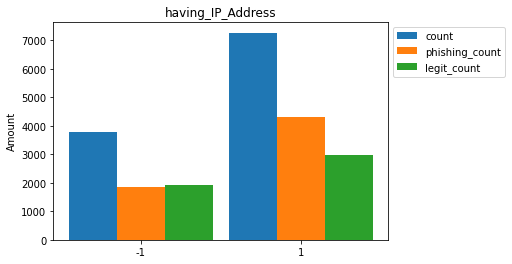

--------------------------------------------------------------------------------


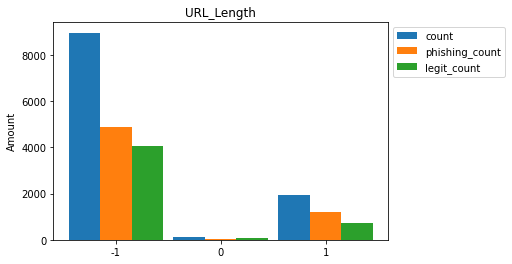

--------------------------------------------------------------------------------


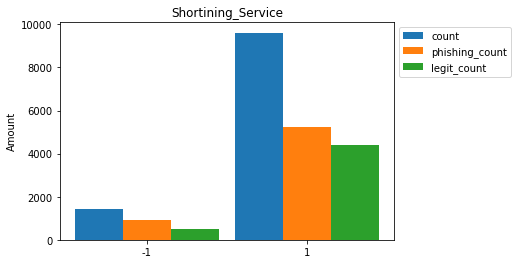

--------------------------------------------------------------------------------


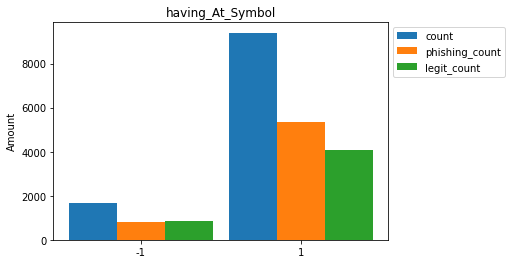

--------------------------------------------------------------------------------


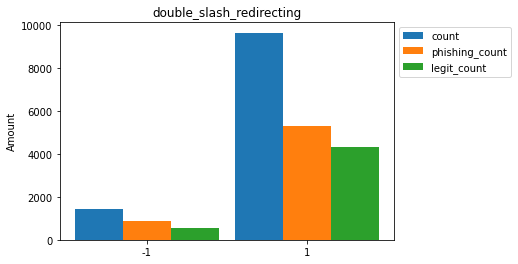

--------------------------------------------------------------------------------


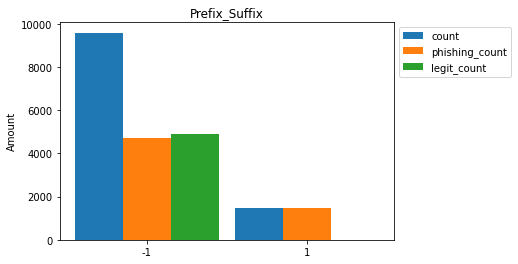

--------------------------------------------------------------------------------


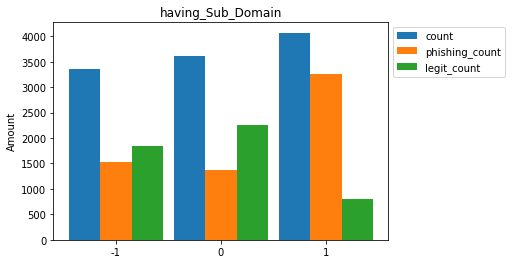

--------------------------------------------------------------------------------


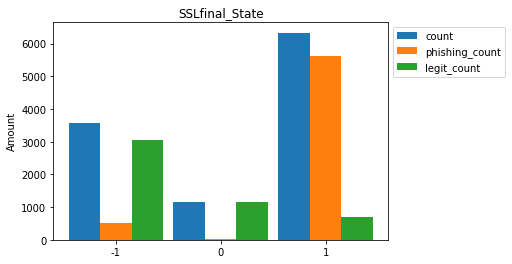

--------------------------------------------------------------------------------


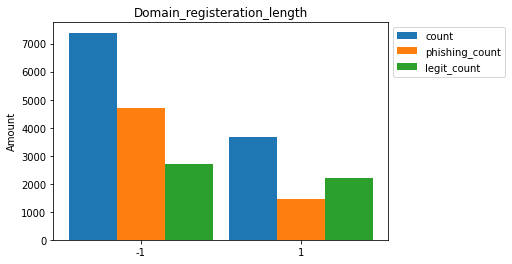

--------------------------------------------------------------------------------


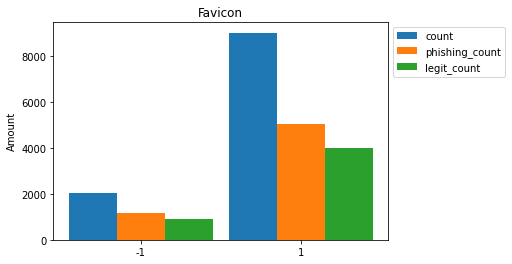

--------------------------------------------------------------------------------


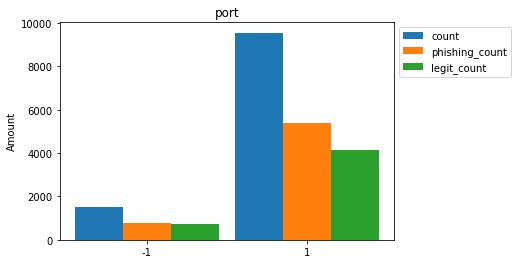

--------------------------------------------------------------------------------


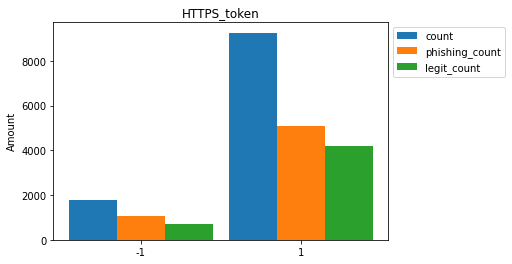

--------------------------------------------------------------------------------


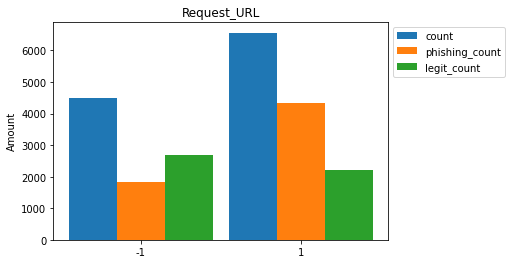

--------------------------------------------------------------------------------


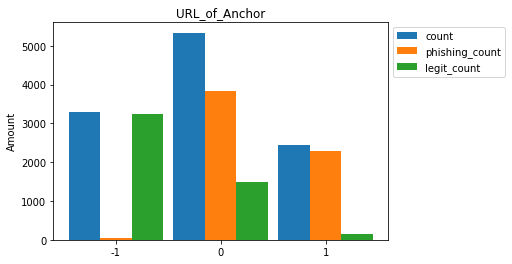

--------------------------------------------------------------------------------


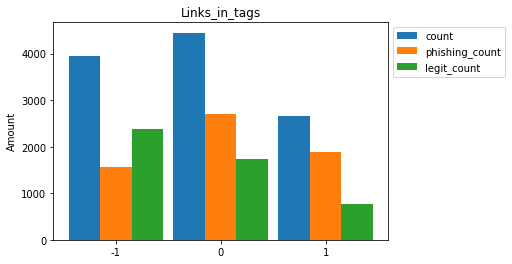

--------------------------------------------------------------------------------


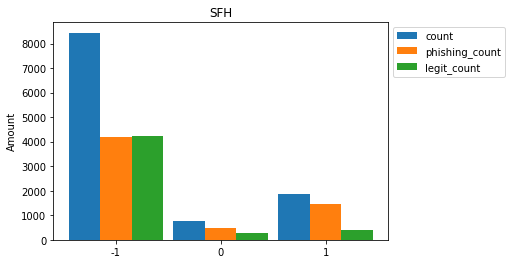

--------------------------------------------------------------------------------


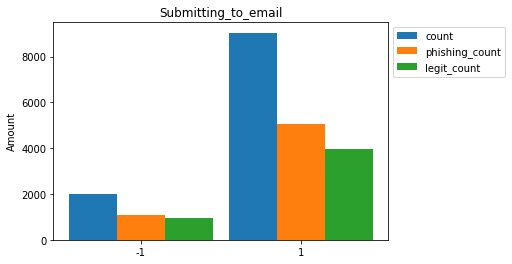

--------------------------------------------------------------------------------


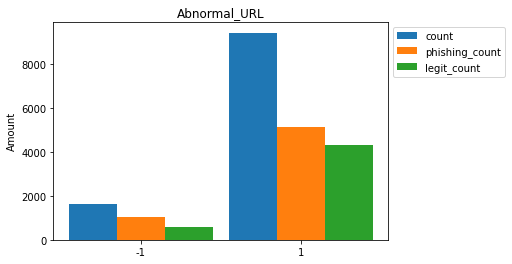

--------------------------------------------------------------------------------


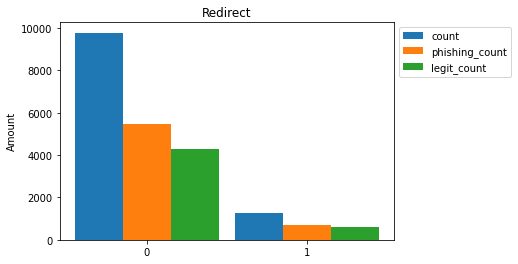

--------------------------------------------------------------------------------


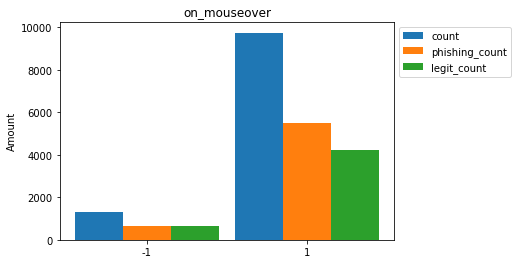

--------------------------------------------------------------------------------


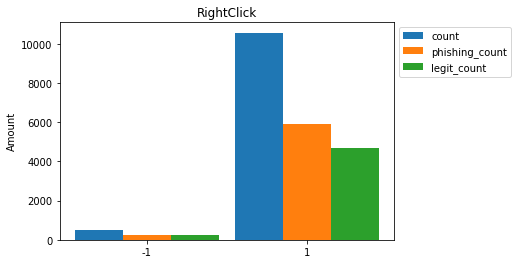

--------------------------------------------------------------------------------


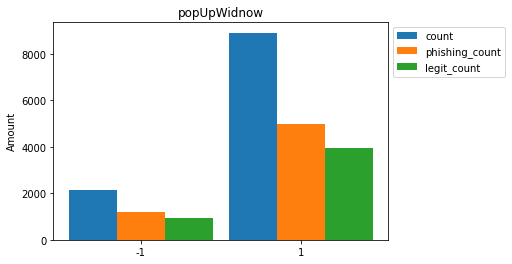

--------------------------------------------------------------------------------


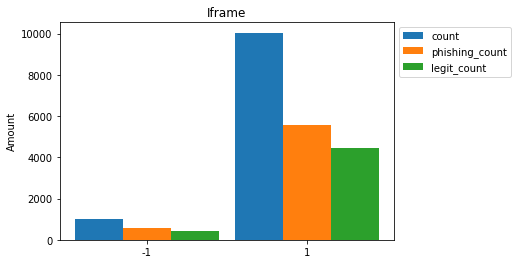

--------------------------------------------------------------------------------


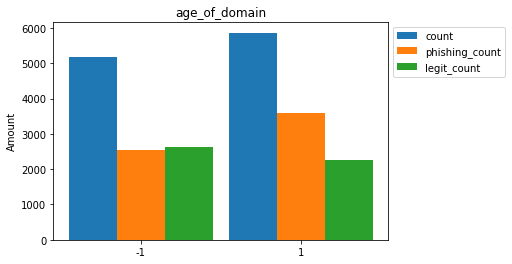

--------------------------------------------------------------------------------


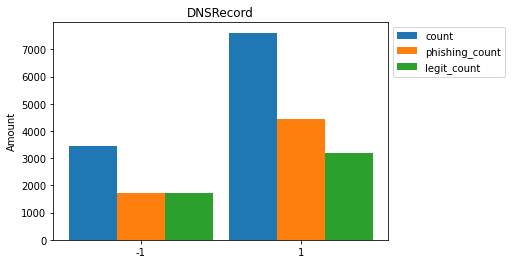

--------------------------------------------------------------------------------


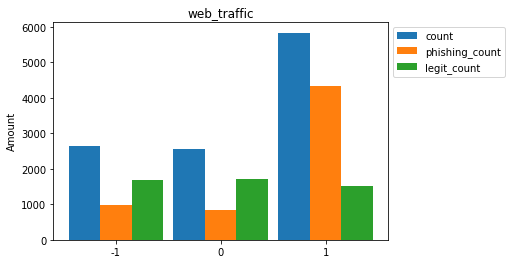

--------------------------------------------------------------------------------


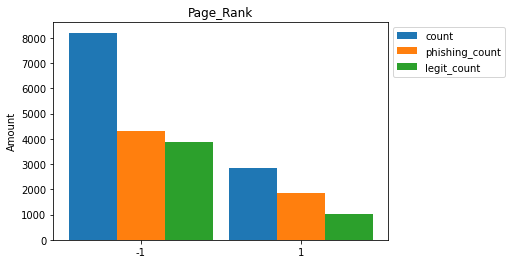

--------------------------------------------------------------------------------


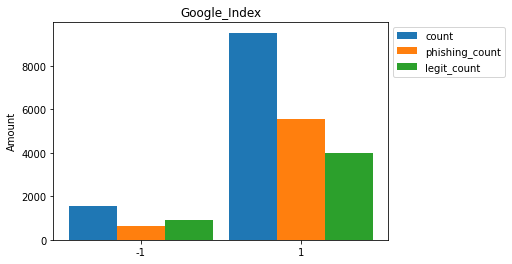

--------------------------------------------------------------------------------


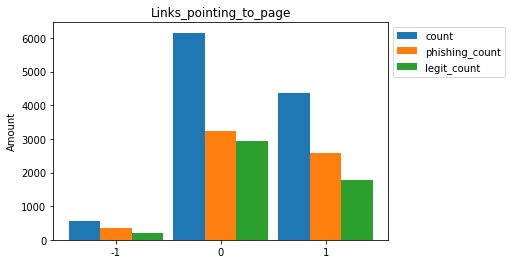

--------------------------------------------------------------------------------


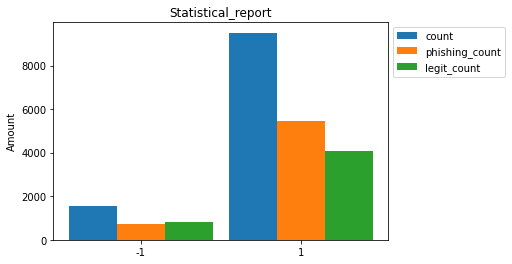

--------------------------------------------------------------------------------


In [30]:
import matplotlib.pyplot as plt
for name in attr_name[:-1]:
    attr_type = sorted(data[name].unique())
    all_count = [len(data[data[name]==t]) for t in attr_type ]
    p_count = [len(data_phishing[data_phishing[name]==t]) for t in attr_type ]
    v_count = [len(data_legit[data_legit[name]==t]) for t in attr_type ]
    x = np.arange(len(attr_type))
    width = 0.3
    plt.bar(x, all_count, width ,label='count')
    plt.bar(x + width, p_count, width, label='phishing_count')
    plt.bar(x + 2*width, v_count, width, label='legit_count')
    plt.xticks(x+width, attr_type)
    
    plt.ylabel('Amount')
    plt.title(name)
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    plt.show()
    
    print('-'*80)

In [36]:
from sklearn.model_selection import train_test_split

# split and shuffle
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=87)

In [37]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


model = CategoricalNB(alpha = 1.0e-10)

model.fit(X_train,y_train)
predict = model.predict(X_test)
print('confusion matrix\n',confusion_matrix(y_test,predict))
print(classification_report(y_test,predict,digits = 4))

confusion matrix
 [[1516  131]
 [ 121 1881]]
              precision    recall  f1-score   support

          -1     0.9261    0.9205    0.9233      1647
           1     0.9349    0.9396    0.9372      2002

    accuracy                         0.9309      3649
   macro avg     0.9305    0.9300    0.9302      3649
weighted avg     0.9309    0.9309    0.9309      3649



In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)

predict = clf.predict(X_test)
print('confusion matrix\n',confusion_matrix(y_test,predict))
print(classification_report(y_test,predict,digits = 4))

confusion matrix
 [[1524  123]
 [ 105 1897]]
              precision    recall  f1-score   support

          -1     0.9355    0.9253    0.9304      1647
           1     0.9391    0.9476    0.9433      2002

    accuracy                         0.9375      3649
   macro avg     0.9373    0.9364    0.9369      3649
weighted avg     0.9375    0.9375    0.9375      3649



In [40]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 30)
neigh.fit(X_train.values, y_train)
predict = neigh.predict(X_test.values)

print('confusion matrix\n',confusion_matrix(y_test,predict))
print(classification_report(y_test,predict,digits = 4))

confusion matrix
 [[1509  138]
 [  71 1931]]
              precision    recall  f1-score   support

          -1     0.9551    0.9162    0.9352      1647
           1     0.9333    0.9645    0.9487      2002

    accuracy                         0.9427      3649
   macro avg     0.9442    0.9404    0.9419      3649
weighted avg     0.9431    0.9427    0.9426      3649

